In [44]:
from pathlib import Path 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme

import IMP 
import IMP.rmf
import RMF

In [57]:
rmsf_file = Path(Path.home(), "mtorc2/manuscript/submission_2/models/126_0_2_3/cluster.0.rmsf.npy")
rmsf_mat = np.load(rmsf_file)

# fig_file = Path(Path.home(), "mtorc2/manuscript/submission_2/figures/rmsf/rmsf.png")
fig_file = Path("/wynton/home/sali/mhancock/mtorc2/manuscript/submission_2/figures/rmsf/rmsf.png")


In [52]:
dim = rmsf_mat.shape[0]

freq = 5
y_pos = list() 
x_labels = list() 
for i in range(dim): 
    if i % freq == 0: 
        y_pos.append(i)
        x_labels.append(res_id_dict[i])

In [56]:
print(fig_file)

/wynton/home/sali/mhancock/mtorc2/manuscript/submission_2/figures/rmsf/rmsf.png


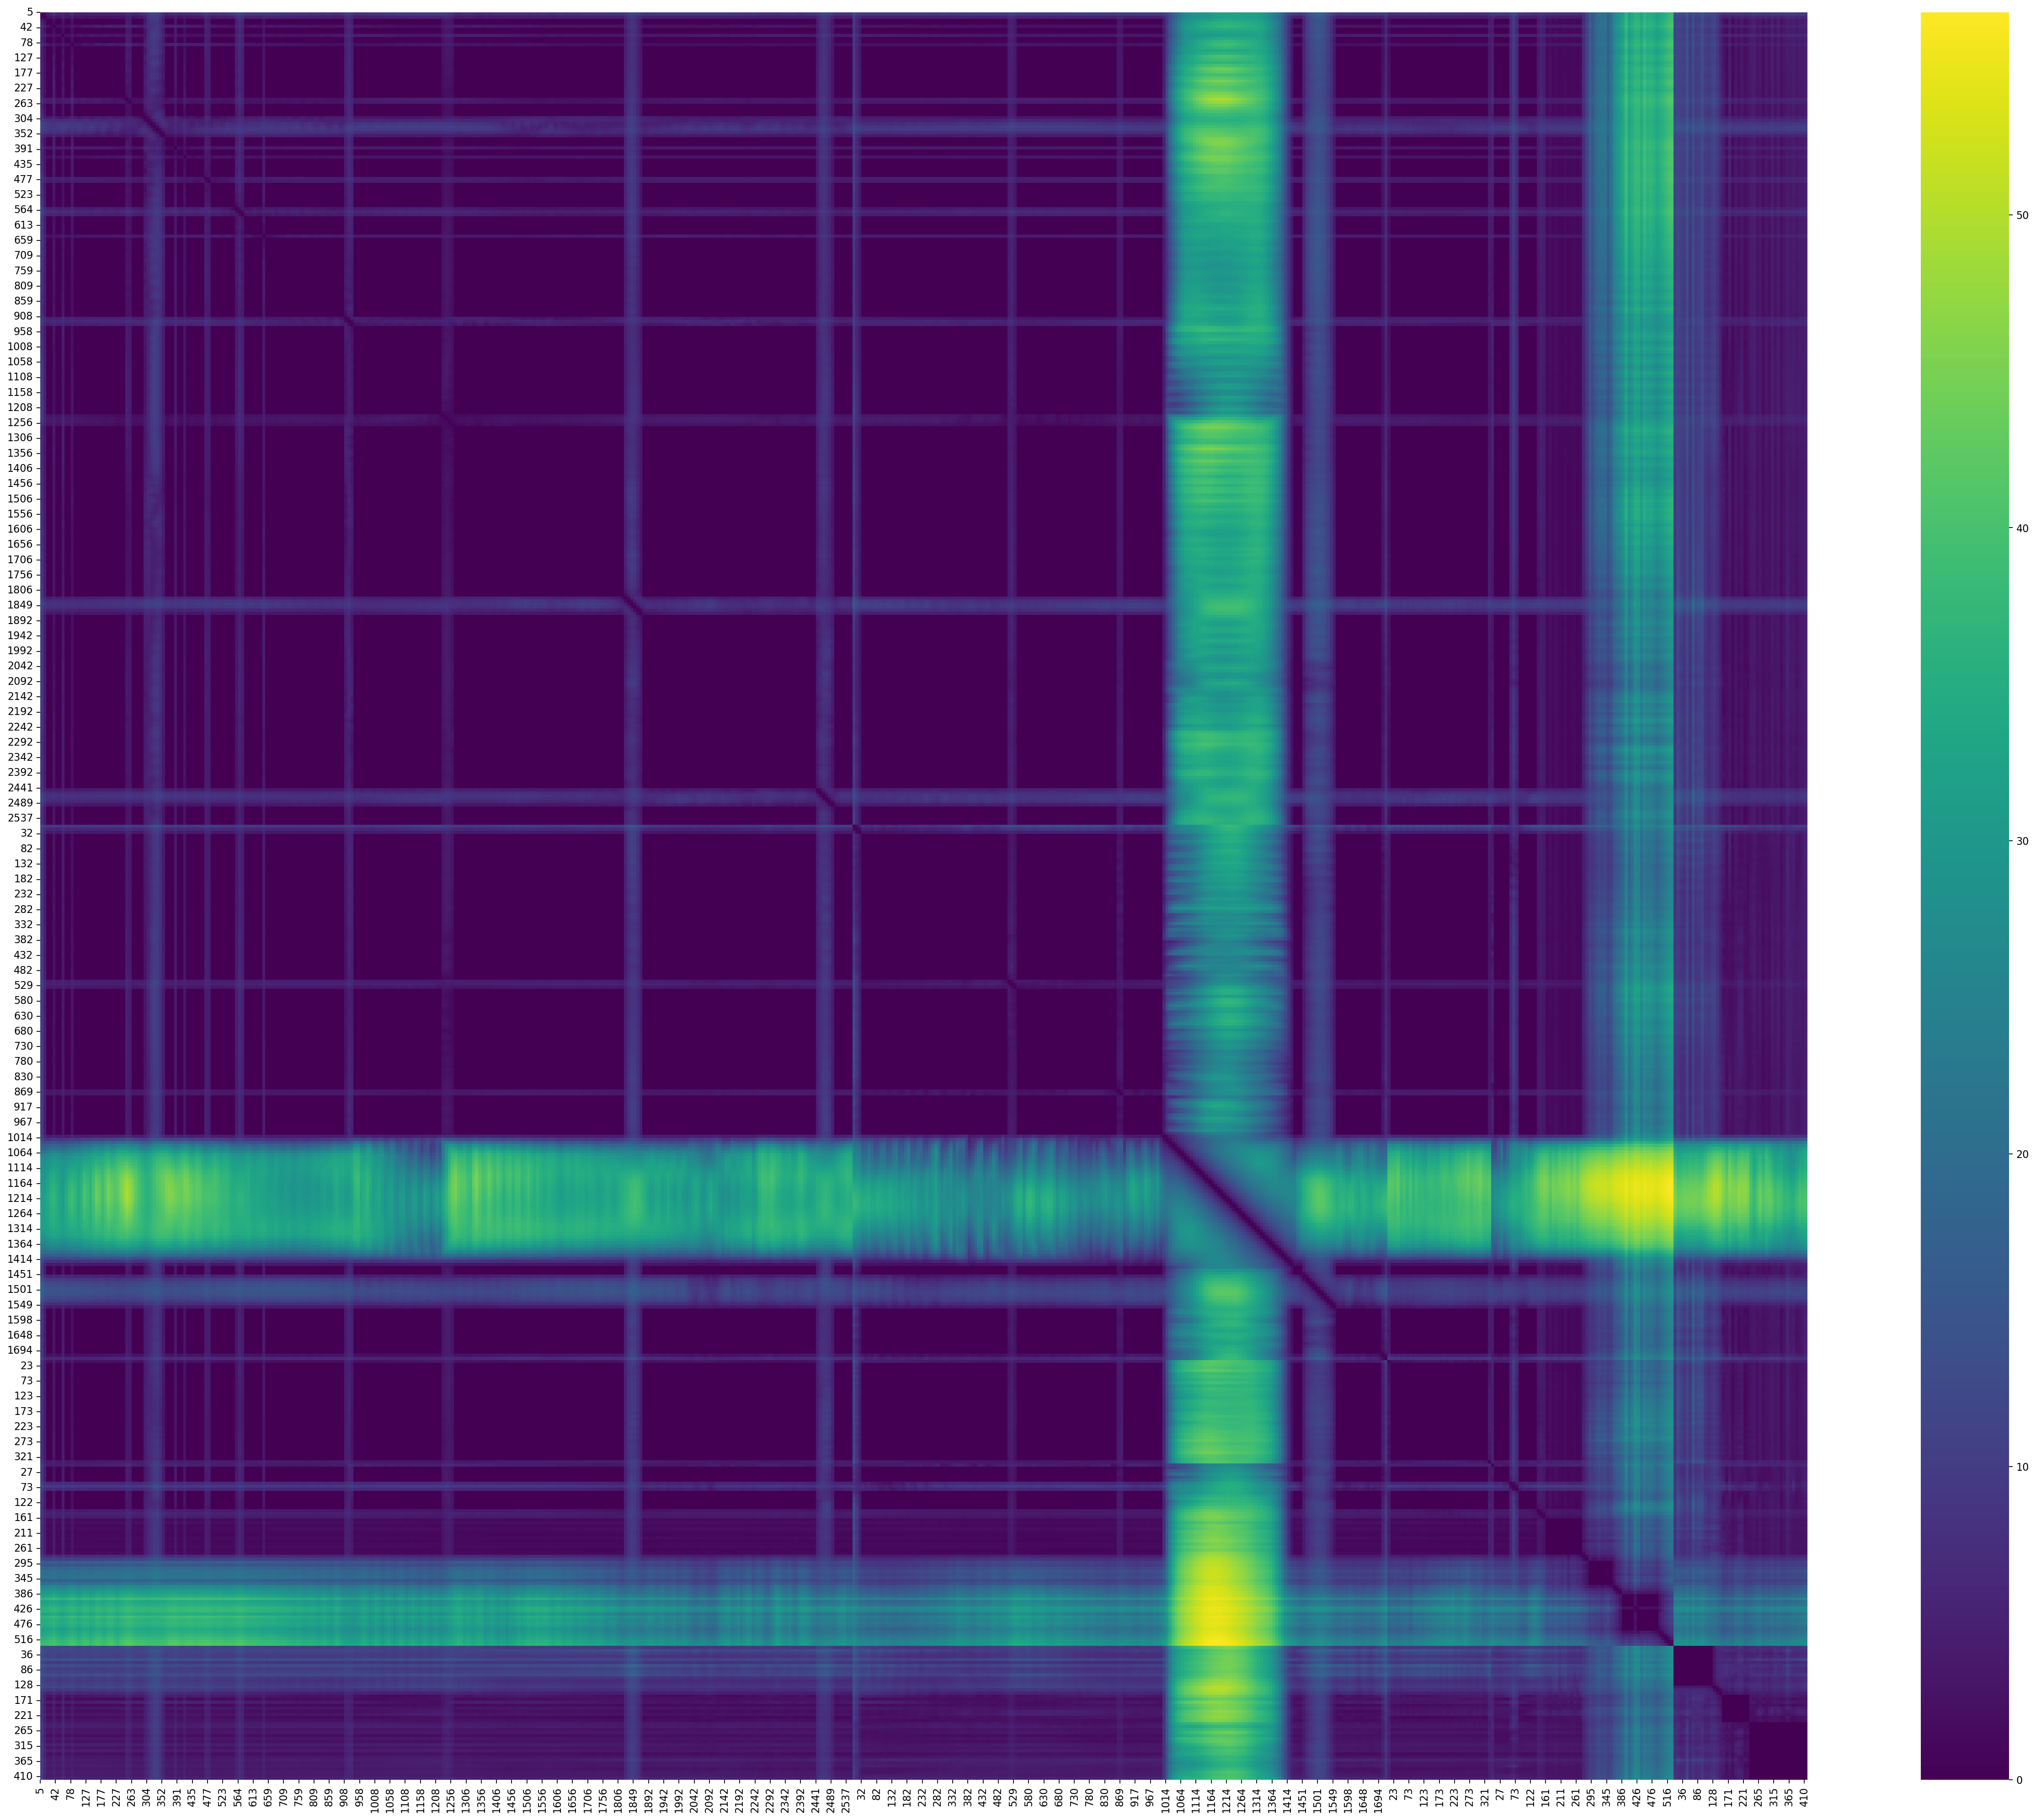

In [58]:
figure(figsize=(40, 32), dpi=160)
# figure(figsize=(20, 16), dpi=80)

sns.heatmap(rmsf_mat, square=True, cmap="viridis")
plt.xticks(y_pos, x_labels)
plt.yticks(y_pos, x_labels)

# plt.show()
plt.savefig(fig_file)

### Map 10-bead indices to average residue indices

In [2]:
rmf_file = Path(Path.home(), "mtorc2/manuscript/submission_2/models/126_0_2_3/cluster.0/cluster_center_model.rmf3")
fh = RMF.open_rmf_file_read_only(str(rmf_file))
m = IMP.Model()
h = IMP.rmf.create_hierarchies(fh, m)[0]
IMP.rmf.load_frame(fh, 0)


In [11]:
for molecule in ["MTOR", "RICTOR", "MLST8", "MSIN1", "AKT1"]:
    sel = IMP.atom.Selection(h, resolution=10, copy_index=0, molecule=molecule)
    pids = sel.get_selected_particle_indexes()
    print(molecule, len(pids))
    
    

MTOR 267
RICTOR 176
MLST8 34
MSIN1 60
AKT1 44


In [39]:
def get_res_bounds(p_name):
    if p_name[0].isnumeric(): 
        if len(p_name.split("_")) > 1: 
            lower_bound = int(p_name.split("_")[0].split("-")[0])
            upper_bound = int(p_name.split("_")[0].split("-")[1])
        else: 
            lower_bound = int(p_name.split(" ")[0])
            upper_bound = lower_bound
    else: 
        lower_bound = int(p_name.split(" ")[1].split("-")[0].split("[")[1])
        upper_bound = int(p_name.split(" ")[1].split("-")[1].split(")")[0])
        
    return lower_bound, upper_bound
        
get_res_bounds("1-10_bead")
get_res_bounds("Fragment [17-27)")
get_res_bounds("257")


(257, 257)

In [41]:
res_id_dict = dict() 

sel = IMP.atom.Selection(h, resolution=10, copy_index=0)
pids = sel.get_selected_particle_indexes()
for i in range(len(pids)):
    pid = pids[i]
    p_name = m.get_particle_name(pid)
#     print(p_name)
    lower_bound, upper_bound = get_res_bounds(p_name)
    res_id = (lower_bound + upper_bound) // 2 

    print(p_name, lower_bound, upper_bound, res_id)
    
    res_id_dict[i] = res_id


1-10_bead 1 10 5
11-16_bead 11 16 13
Fragment [17-27) 17 27 22
Fragment [27-31) 27 31 29
31-36_bead 31 36 33
Fragment [37-47) 37 47 42
Fragment [47-54) 47 54 50
54-59_bead 54 59 56
Fragment [60-70) 60 70 65
Fragment [70-75) 70 75 72
75-81_bead 75 81 78
Fragment [82-92) 82 92 87
Fragment [92-102) 92 102 97
Fragment [102-112) 102 112 107
Fragment [112-122) 112 122 117
Fragment [122-132) 122 132 127
Fragment [132-142) 132 142 137
Fragment [142-152) 142 152 147
Fragment [152-162) 152 162 157
Fragment [162-172) 162 172 167
Fragment [172-182) 172 182 177
Fragment [182-192) 182 192 187
Fragment [192-202) 192 202 197
Fragment [202-212) 202 212 207
Fragment [212-222) 212 222 217
Fragment [222-232) 222 232 227
Fragment [232-242) 232 242 237
Fragment [242-247) 242 247 244
247-256_bead 247 256 251
257 257 257 257
Fragment [258-268) 258 268 263
Fragment [268-278) 268 278 273
Fragment [278-288) 278 288 283
Fragment [288-290) 288 290 289
290-299_bead 290 299 294
300-309_bead 300 309 304
310-319_bead 